## DATA DOWNLOAD LINK

In [1]:
from urllib import request 
import os
import zipfile
data_name = ['CRC_DX_TRAIN_MSIMUT', 'CRC_DX_TRAIN_MSS', 'CRC_DX_TEST_MSS', 'CRC_DX_TEST_MSIMUT'] 
front_link = 'https://zenodo.org/record/2530835/files/' 
back_link = '.zip?download=1' 

# 폴더 디렉토리 생성 
os.makedirs('/content/TCGA_DATA') 
os.makedirs('/content/TCGA_DATA/CRC_TRAIN') 
os.makedirs('/content/TCGA_DATA/CRC_TEST')

for idx, data_type in enumerate(data_name):
  # 코랩 아니면 아래 경로 수정
  if idx <= 1:
    os.chdir('/content/TCGA_DATA/CRC_TRAIN')
  else:
    os.chdir('/content/TCGA_DATA/CRC_TEST')
  
  link = front_link + data_type + back_link
  request.urlretrieve(link,data_type) 
  zipfile.ZipFile(data_type).extractall()  
  print('One Done')



One Done
One Done
One Done
One Done


## DATA PATH 가져오기 

In [26]:
from glob import glob
DATA_PATH_TRAIN_LIST = glob('/content/TCGA_DATA/CRC_TRAIN/*/*.png') 
DATA_PATH_TEST_LIST = glob('/content/TCGA_DATA/CRC_TRAIN/*/*.png')

## Custom DataSet 

In [29]:
from torch.utils.data import Dataset, DataLoader
from skimage import io, transform

class CRC_DataSet(Dataset):
    #data_path_list - 이미지 path 전체 리스트
    #label - 이미지 ground truth
    def __init__(self, data_path_list, classes, transform=None):
        self.path_list = data_path_list
        self.label = []
        for path in data_path_list:
            self.label.append(path.split('/')[-2])
        self.transform = transform
        self.classes = classes
    
    def __len__(self):
        return len(self.path_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        image = io.imread(self.path_list[idx])
        if self.transform is not None:
            image = self.transform(image)
        return image, self.classes.index(self.label[idx])

## Data Loader

In [30]:
import torch
from torchvision import transforms 

classes = ('MSIMUT', 'MSS')

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainloader = torch.utils.data.DataLoader(
    CRC_DataSet(
        DATA_PATH_TRAIN_LIST, 
        classes,
        transform=transform
    ),
    batch_size=4,
    shuffle = True
)

testloader = torch.utils.data.DataLoader(
    CRC_DataSet(
        DATA_PATH_TEST_LIST, 
        classes,
        transform=transform
    ),
    batch_size=4,
    shuffle = False
)

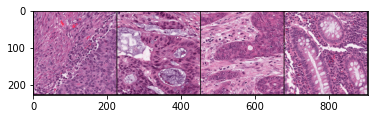

In [41]:
from matplotlib import pyplot as plt
import torchvision
import numpy as np
dataiter = iter(trainloader)
images, labels = dataiter.next() 
plt.imshow(torchvision.utils.make_grid(images, normalize= True).permute(1,2,0)) 
plt.show()